현재 운용중인 주식종목을 가지고 데이터 분석과 리스크 데이터를 얻기위한 프로젝트

In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

데이터를 바로 넣기 위해 사용

In [3]:
from pandas.io.data import DataReader

C:\Anaconda3\lib\site-packages\pandas\io\data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [4]:
from datetime import datetime
from __future__ import division

In [5]:
tech_list=['AAPL','GOOG','MSFT','RACE']

기간은 지금부터 지난 1년간의 기록으로 함

In [6]:
end=datetime.now()
start=datetime(end.year-1,end.month,end.day)

현재 운용중인 애플 AAPL, 구글 GOOG, 마이크로소프트 MSFT, 페라리 RACE

In [7]:
for stock in tech_list:
    globals()[stock]=DataReader(stock,'yahoo',start,end)

In [8]:
RACE.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-10-21,60.000000,60.970001,55.000000,55.000000,22425300,54.308311
2015-10-22,57.070000,58.200001,55.700001,56.750000,4545100,56.036303
2015-10-23,57.770000,58.000000,56.270000,56.380001,1967600,55.670957
2015-10-26,57.000000,57.000000,54.535000,55.020000,1466200,54.328060
2015-10-27,54.799999,54.990002,49.360001,53.849998,5949200,53.172772


페라리 주식에 관하여 오픈할떄, 가장 높았을떄, 가장 낮을떄, 폐장시, 거래량 등이 나온것을 볼 수 있다

In [9]:
RACE.describe()

,Open,High,Low,Close,Volume,Adj Close
count,157.000000,157.000000,157.000000,157.000000,1.570000e+02,157.000000
mean,44.139490,44.729351,43.312070,43.986115,1.115653e+06,43.466739
std,5.101472,5.100919,4.777928,4.810447,2.003086e+06,4.739215
min,32.290001,32.480000,31.660000,32.000000,1.506000e+05,31.597563
25%,40.980000,41.520000,40.529999,41.099998,4.254000e+05,40.583118
50%,43.090000,43.525002,42.630001,42.980000,5.892000e+05,42.540001
75%,47.340000,48.127998,46.560001,47.209999,1.263500e+06,46.616278
max,60.000000,60.970001,56.270000,56.750000,2.242530e+07,56.036303


57$에 들어갔는데 평균가도 안나오고 답없는 상황 ㅠㅠ

In [10]:
RACE.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 157 entries, 2015-10-21 to 2016-06-06
Data columns (total 6 columns):
Open         157 non-null float64
High         157 non-null float64
Low          157 non-null float64
Close        157 non-null float64
Volume       157 non-null int64
Adj Close    157 non-null float64
dtypes: float64(5), int64(1)
memory usage: 8.6 KB


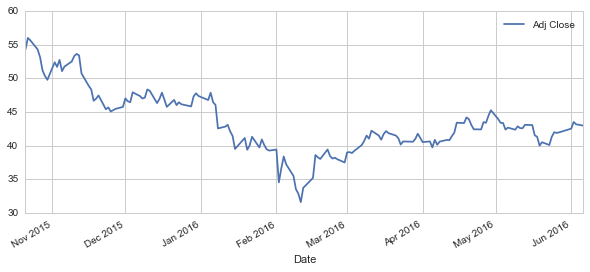

In [11]:
RACE['Adj Close'].plot(legend=True,figsize=(10,4))

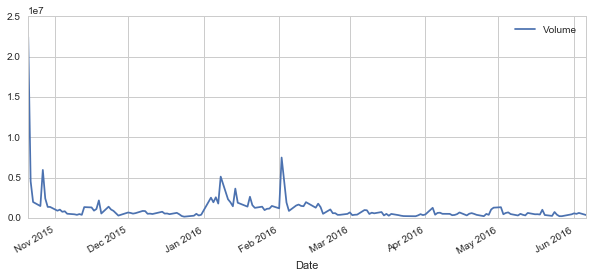

In [12]:
RACE.Volume.plot(legend=True,figsize=(10,4))

초기 15년 11월에 상장시 엄청나게 높았던 거래량은 바닥을 치고 있다 (계속해서 신차가 나옴에도 불구하고)

In [13]:
ma_day=[10,20,50]
for ma in ma_day:
    column_name="MA for %s days" %(str(ma))
    RACE[column_name]=pd.rolling_mean(AAPL['Adj Close'],ma)

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()


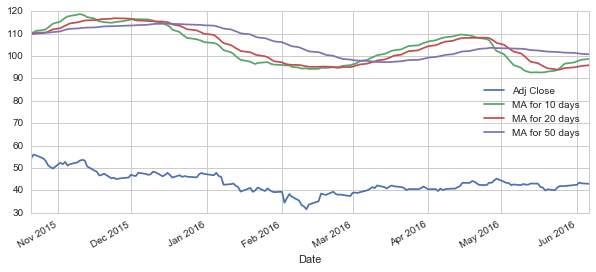

In [14]:
RACE[['Adj Close','MA for 10 days','MA for 20 days',"MA for 50 days"]].plot(subplots=False,figsize=(10,4))

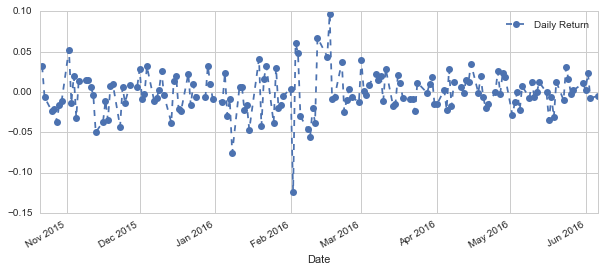

In [15]:
RACE['Daily Return']=RACE['Adj Close'].pct_change()
RACE['Daily Return'].plot(figsize=(10,4),legend=True,marker='o',linestyle='--')

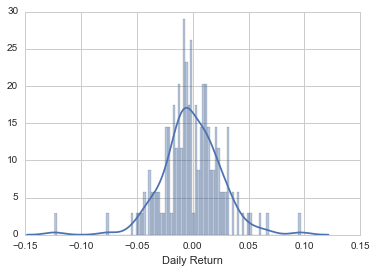

In [16]:
sns.distplot(RACE['Daily Return'].dropna(),bins=100)

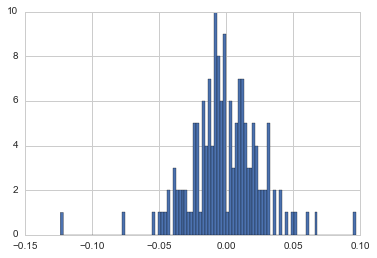

In [17]:
RACE['Daily Return'].hist(bins=100)

In [18]:
closing_df=DataReader(tech_list,'yahoo',start,end)['Adj Close']
closing_df.head()

,AAPL,GOOG,MSFT,RACE
Date,,,,
2015-06-08,125.235672,526.830017,44.493357,NaN
2015-06-09,124.863292,526.690002,44.415522,NaN
2015-06-10,126.294003,536.690002,45.349560,NaN
2015-06-11,126.009814,534.609985,45.184156,NaN
2015-06-12,124.618308,532.330017,44.726868,NaN


In [19]:
tech_rets=closing_df.pct_change()
tech_rets.head()

,AAPL,GOOG,MSFT,RACE
Date,,,,
2015-06-08,NaN,NaN,NaN,NaN
2015-06-09,-0.002973,-0.000266,-0.001749,NaN
2015-06-10,0.011458,0.018987,0.021030,NaN
2015-06-11,-0.002250,-0.003876,-0.003647,NaN
2015-06-12,-0.011043,-0.004265,-0.010121,NaN


seaborn 을 이용한 그래프 표현

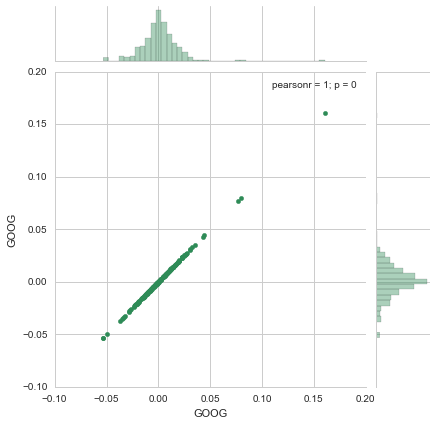

In [20]:
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

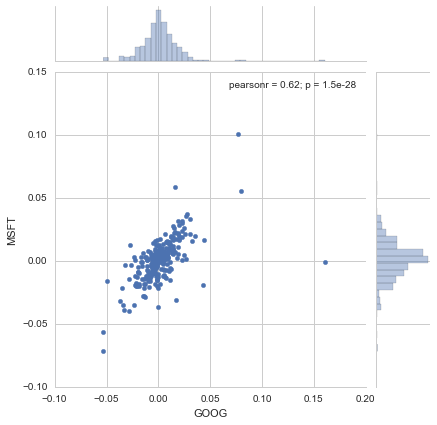

In [21]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

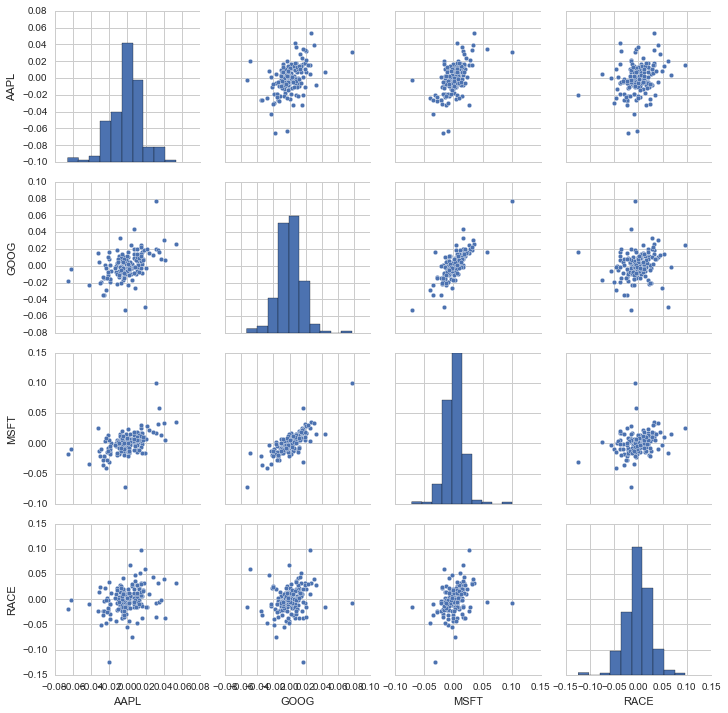

In [22]:
sns.pairplot(tech_rets.dropna())

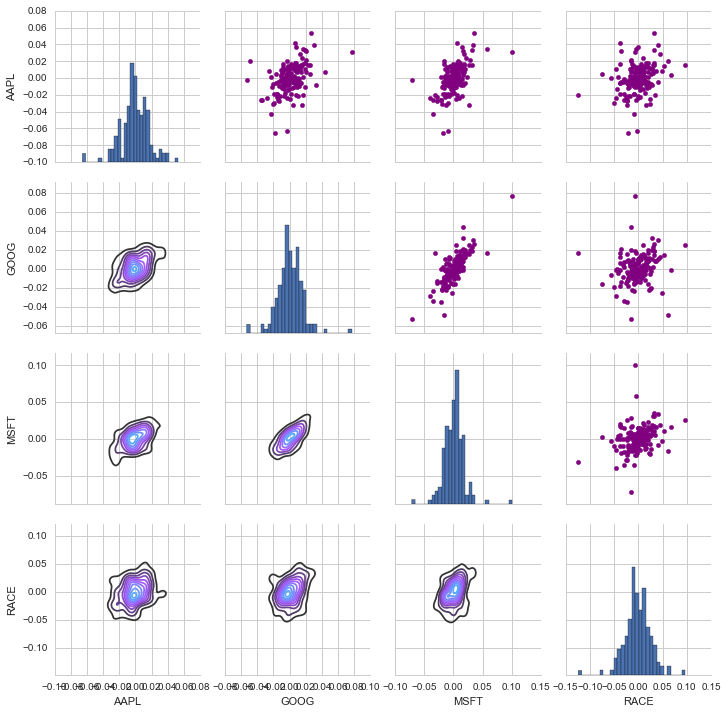

In [23]:
returns_fig=sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

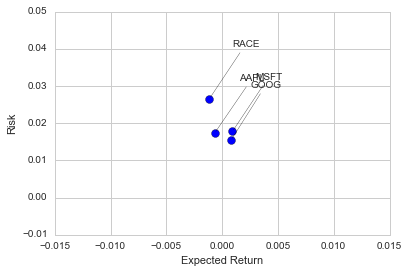

In [24]:
rets=tech_rets.dropna()
area=np.pi*20
plt.scatter(rets.mean(),rets.std(),s=area)
plt.xlabel("Expected Return")
plt.ylabel("Risk")

for label,x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
        label,
        xy=(x,y),xytext=(50,50),
        textcoords='offset points',ha='right',va='bottom',
        arrowprops=dict(arrowstyle='-',connectionstyle='arc3,rad=0'))

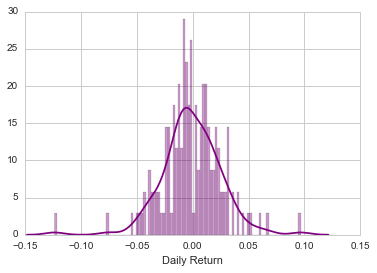

In [25]:
sns.distplot(RACE['Daily Return'].dropna(),bins=100,color='purple')

In [26]:
rets.head()

,AAPL,GOOG,MSFT,RACE
Date,,,,
2015-10-22,0.015295,0.014285,0.017585,0.031818
2015-10-23,0.030996,0.077034,0.100770,-0.006520
2015-10-26,-0.031911,0.015356,0.026102,-0.024122
2015-10-27,-0.006332,-0.006019,-0.010323,-0.021265
2015-10-28,0.041205,0.006295,0.005401,-0.036769


In [27]:
rets['RACE'].quantile(0.05)

-0.039472111987425479

In [28]:
days=365
dt=1/365
mu=rets.mean()['RACE']
sigma=rets.std()['RACE']

In [29]:
def stock_monte_carlo(start_price,days,mu,sigma):
    price=np.zeros(days)
    price[0]=start_price
    shock=np.zeros(days)
    drift=np.zeros(days)
    for x in range(1,days):
        shock[x]=np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        drift[x]=mu*dt
        price[x]=price[x-1]+(price[x-1]*(drift[x]+shock[x]))
    return price

In [30]:
RACE.head()

,Open,High,Low,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2015-10-21,60.000000,60.970001,55.000000,55.000000,22425300,54.308311,109.991581,109.841957,110.405213,NaN
2015-10-22,57.070000,58.200001,55.700001,56.750000,4545100,56.036303,110.582204,109.866566,110.410332,0.031818
2015-10-23,57.770000,58.000000,56.270000,56.380001,1967600,55.670957,111.267325,110.081651,110.487704,-0.006520
2015-10-26,57.000000,57.000000,54.535000,55.020000,1466200,54.328060,111.629574,110.221431,110.474316,-0.024122
2015-10-27,54.799999,54.990002,49.360001,53.849998,5949200,53.172772,111.901260,110.491641,110.422932,-0.021265


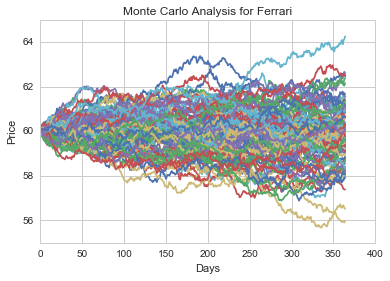

In [31]:
start_price=60.00
for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Ferrari')

In [32]:
runs=10000
simulations=np.zeros(runs)
for run in range(runs):
    simulations[run]=stock_monte_carlo(start_price,days,mu,sigma)[days-1]

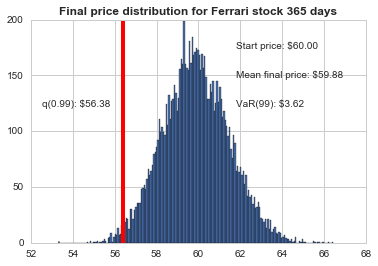

In [33]:
q=np.percentile(simulations,1)
plt.hist(simulations,bins=200)
plt.figtext(0.6,0.8,s='Start price: $%.2f' %start_price)

plt.figtext(0.6,0.7, 'Mean final price: $%.2f' %simulations.mean())

plt.figtext(0.6,0.6, 'VaR(99): $%.2f' %(start_price-q,))
plt.figtext(0.15,0.6, "q(0.99): $%.2f" %q)
plt.axvline(x=q,linewidth=4,color='r')
plt.title("Final price distribution for Ferrari stock %s days" %days,weight='bold');